In [2]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet201

In [2]:
# !pip install Augmentor

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


<Figure size 1200x600 with 0 Axes>

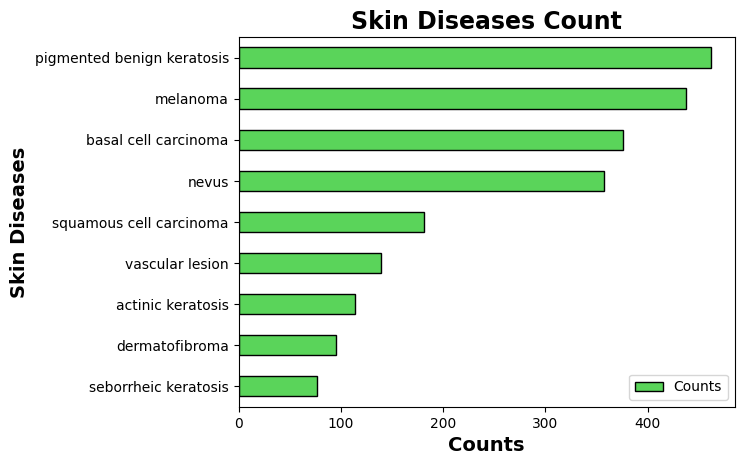

In [3]:
path = '/Users/godenaan/Documents/400L project/Dataset/Train'
folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
data = {folder: len(os.listdir(os.path.join(path, folder))) for folder in folders}
df = pd.DataFrame(list(data.items()), columns=['Skin Diseases', 'Counts'])
df = df.sort_values(by='Counts')

# data = pd.DataFrame({folder: [len(os.listdir(os.path.join(path, folder)))] for folder in os.listdir(path)}).T[0]
plt.figure(figsize=(12, 6))
ax = df.plot(kind='barh', x='Skin Diseases', y='Counts', color='#5ad45a', edgecolor='black')
ax.set_xlabel('Counts', fontsize=14, fontweight='bold')
ax.set_ylabel('Skin Diseases', fontsize=14, fontweight='bold')
ax.set_title('Skin Diseases Count', fontsize=17, fontweight='bold')
plt.show()

In [14]:

for i in ['pigmented benign keratosis',
          'melanoma',
          'vascular lesion',
          'actinic keratosis',
          'squamous cell carcinoma',
          'basal cell carcinoma',
          'seborrheic keratosis',
          'dermatofibroma',
          'nevus']:
    input_dir = os.path.join(path_to_training_dataset, i)
    output_dir = os.path.join('/Users/godenaan/Documents/400L project/Aug', i)
    os.makedirs(input_dir, exist_ok=True)
    os.makedirs(output_dir, exist_ok=True)
    p = Augmentor.Pipeline(input_dir, output_directory=output_dir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 462 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15EF24750>: 100%|██████████| 1000/1000 [00:33<00:00, 29.61 Samples/s]                 


Initialised with 438 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/melanoma.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x15ECB0650>: 100%|██████████| 1000/1000 [02:36<00:00,  6.41 Samples/s]                 


Initialised with 139 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15EC22850>: 100%|██████████| 1000/1000 [00:34<00:00, 29.24 Samples/s]                 


Initialised with 114 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15E553150>: 100%|██████████| 1000/1000 [00:30<00:00, 33.13 Samples/s]                 


Initialised with 181 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15EA23310>: 100%|██████████| 1000/1000 [00:30<00:00, 32.26 Samples/s]                 


Initialised with 376 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x15EFA3990>: 100%|██████████| 1000/1000 [00:32<00:00, 30.66 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x15DFB5910>: 100%|██████████| 1000/1000 [01:10<00:00, 14.27 Samples/s]                 


Initialised with 95 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/dermatofibroma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x127AC99D0>: 100%|██████████| 1000/1000 [00:33<00:00, 29.69 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /Users/godenaan/Documents/400L project/Aug/nevus.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x15EC2D0D0>: 100%|██████████| 1000/1000 [02:57<00:00,  5.62 Samples/s]                   


<Figure size 1200x600 with 0 Axes>

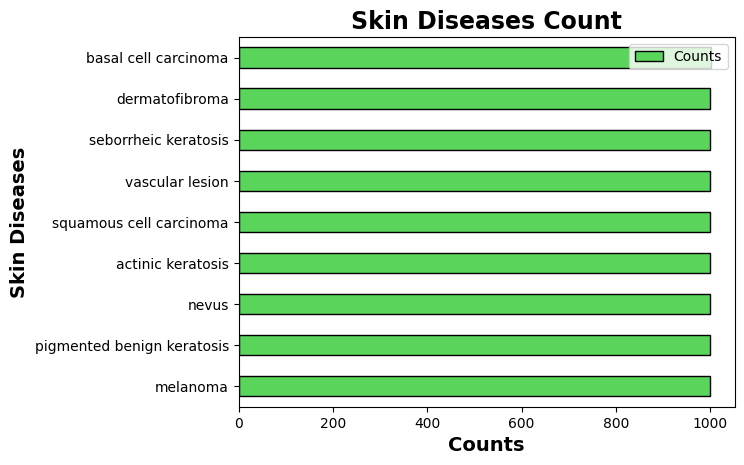

In [4]:
path = '/Users/godenaan/Documents/400L project/Aug'

# Get a list of folders in the path directory
folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

# Create a dictionary with folder names as keys and image counts as values
data = {folder: len(os.listdir(os.path.join(path, folder))) for folder in folders}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(data.items()), columns=['Skin Diseases', 'Counts'])

# Sort the DataFrame by image count
df = df.sort_values(by='Counts')

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = df.plot(kind='barh', x='Skin Diseases', y='Counts', color='#5ad45a', edgecolor='black')
ax.set_xlabel('Counts', fontsize=14, fontweight='bold')
ax.set_ylabel('Skin Diseases', fontsize=14, fontweight='bold')
ax.set_title('Skin Diseases Count', fontsize=17, fontweight='bold')
plt.show()

In [5]:
non = ['pigmented benign keratosis', 'vascular lesion', 'nevus',  'seborrheic keratosis',  'dermatofibroma']
can = ['melanoma','actinic keratosis', 'squamous cell carcinoma','basal cell carcinoma']

In [6]:
def image_extractor(img):
    image = cv.imread(img, cv.IMREAD_COLOR)
    if image is not None:
        image = cv.resize(image, (224, 224))
        image = image/255
        return image.astype(np.float32)
    else:
        return image

In [7]:
def label_encoder(name):
    if 'actinic keratosis' in name:
        return 0
    if 'basal cell carcinoma' in name:
        return 1
    if 'dermatofibroma' in name:
        return 2
    if 'melanoma' in name:
        return 3
    if 'nevus' in name:
        return 4
    if 'pigmented benign keratosis' in name:
        return 5
    if 'seborrheic keratosis' in name:
        return 6
    if 'squamous cell carcinoma' in name:
        return 7
    if 'vascular lesion' in name:
        return 8

In [8]:
X_train = []
y_train = []
path = '/Users/godenaan/Documents/400L project/Aug'
for folder in [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]:
    for file in os.listdir(os.path.join(path, folder)):
        file = os.path.join(path, folder, file)
        image = image_extractor(file)
        if image is not None:
            X_train.append(image)
            y_train.append(label_encoder(folder))

In [9]:
X_test = []
y_test = []
path = '/Users/godenaan/Documents/400L project/Dataset/Test'
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file = os.path.join(folder_path, file)
            image = image_extractor(file)
            if image is not None:
                X_test.append(image)
                y_test.append(label_encoder(folder))

In [10]:
X_train = np.array(X_train).reshape(-1, 224, 224, 3)
y_train = tf.keras.utils.to_categorical(np.array(y_train), num_classes = 9)
print(X_train.shape, y_train.shape)

(9000, 224, 224, 3) (9000, 9)


In [11]:
X_test = np.array(X_test).reshape(-1, 224, 224, 3)
y_test = tf.keras.utils.to_categorical(np.array(y_test), num_classes = 9)
print(X_test.shape, y_test.shape)

(118, 224, 224, 3) (118, 9)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [13]:
model = Sequential([
                    Input((224, 224, 3)),
                    Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dropout(0.5),
                    BatchNormalization(),
                    Dense(9, activation = 'softmax')
                     ])

In [14]:
optimiser = Adam(learning_rate = 0.0001)
model.compile(optimizer = optimiser, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [15]:
history = model.fit(X_train, y_train, 
                    verbose = 1,
                    validation_data = (X_val, y_val), epochs = 25, batch_size = 64, 
                    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1, restore_best_weights = True)])

Epoch 1/25
113/113 [==============================] - 1536s 13s/step - loss: 2.1293 - accuracy: 0.2000 - val_loss: 2.0138 - val_accuracy: 0.2956
Epoch 2/25
113/113 [==============================] - 1631s 14s/step - loss: 1.7241 - accuracy: 0.3703 - val_loss: 1.8761 - val_accuracy: 0.4428
Epoch 3/25
113/113 [==============================] - 1112s 10s/step - loss: 1.5480 - accuracy: 0.4578 - val_loss: 1.6664 - val_accuracy: 0.5650
Epoch 4/25
113/113 [==============================] - 1187s 10s/step - loss: 1.3911 - accuracy: 0.5489 - val_loss: 1.5050 - val_accuracy: 0.6628
Epoch 5/25
113/113 [==============================] - 1298s 11s/step - loss: 1.2653 - accuracy: 0.6176 - val_loss: 1.2208 - val_accuracy: 0.6756
Epoch 6/25
113/113 [==============================] - 1468s 13s/step - loss: 1.1521 - accuracy: 0.6631 - val_loss: 1.1294 - val_accuracy: 0.7272
Epoch 7/25
113/113 [==============================] - 1400s 12s/step - loss: 1.0650 - accuracy: 0.7093 - val_loss: 1.0308 - val_ac

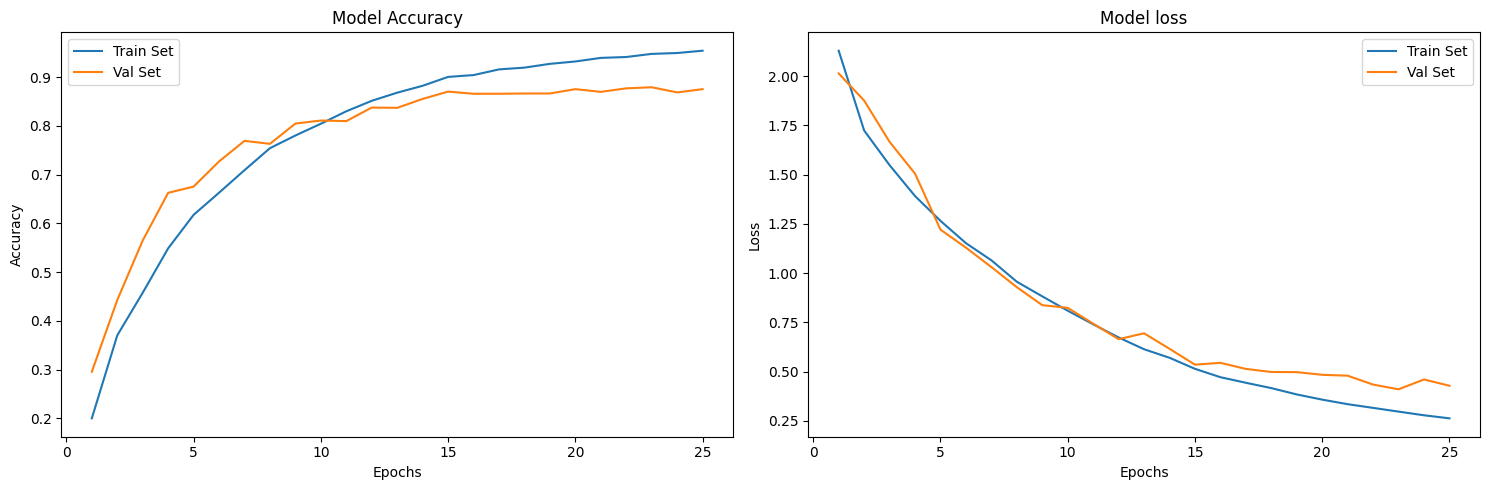

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Train Set')
plt.plot(epochs_range, val_acc, label = 'Val Set')
plt.legend(loc = 'best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Train Set')
plt.plot(epochs_range, val_loss, label = 'Val Set')
plt.legend(loc = 'best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss')

plt.tight_layout()
plt.show()

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

4/4 [==============================] - 4s 746ms/step - loss: 2.1649 - accuracy: 0.3898
Test Loss: 2.1649
Test Accuracy: 0.3898


In [18]:
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(model.predict(X_test), axis = 1)

4/4 [==============================] - 13s 1s/step


In [19]:
class_names = ["melanoma", "pigmented benign keratosis", "vascular lesion", "actinic keratosis", "basal cell carcinoma", "dermatofibroma", "nevus", "seborrheic keratosis", "squamous cell carcinoma"]
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
                             precision    recall  f1-score   support

                  melanoma       0.33      0.06      0.11        16
pigmented benign keratosis       0.44      0.50      0.47        16
           vascular lesion       0.71      0.31      0.43        16
         actinic keratosis       0.25      0.12      0.17        16
      basal cell carcinoma       0.31      0.81      0.45        16
            dermatofibroma       0.43      0.62      0.51        16
                     nevus       0.00      0.00      0.00         3
      seborrheic keratosis       0.45      0.31      0.37        16
   squamous cell carcinoma       0.40      0.67      0.50         3

                  accuracy                           0.39       118
                 macro avg       0.37      0.38      0.33       118
              weighted avg       0.41      0.39      0.35       118



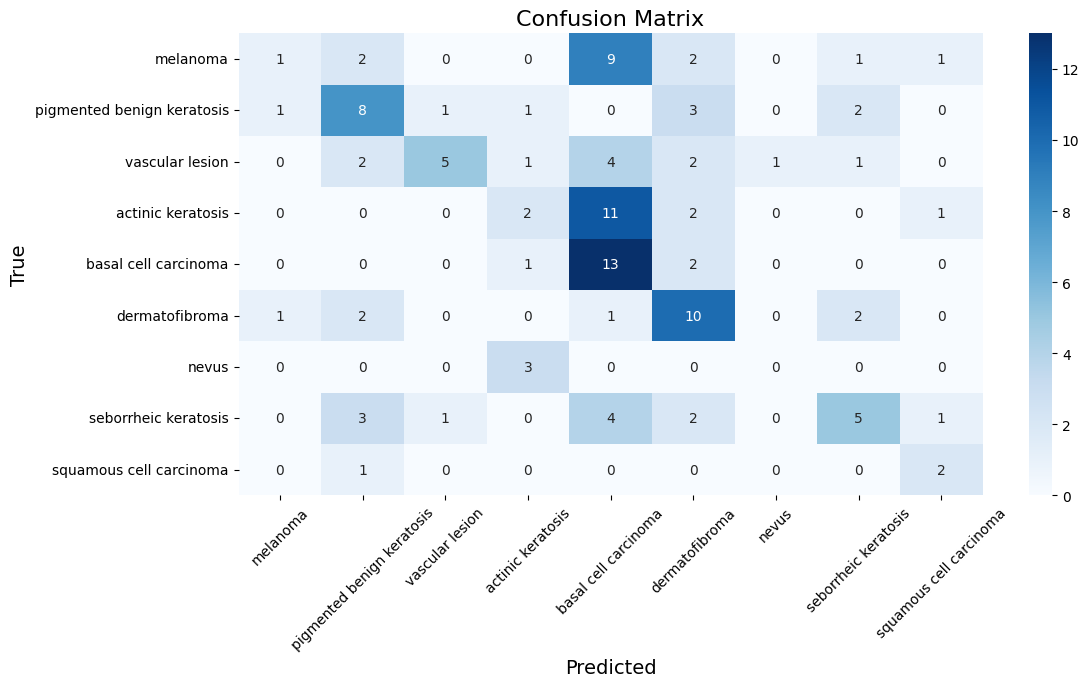

In [20]:
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xticks(rotation = 45)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

In [21]:
model.save('Model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
